In [1]:
import pandas as pd
import numpy as np

import lib.draw as draw
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
import pickle

# Loading data

In [2]:
df = pd.read_csv('data/formated_data.csv').drop('Unnamed: 0', axis = 1)
df = df[df.isShot]
df

,type,player,team,success,x,y,endX,endY,isShot,isGoal,...,prevForwardAct,prevCross,prevPass,prevDribble,r,a,rebound_r,rebound_a,dribble_r,dribble_a
43,SavedShot,322852,2187,1,0.725,0.460,0.725,0.460,True,False,...,True,False,True,False,0.0,0.5,0.0,0.5,0.0,0.5
66,SavedShot,322852,2187,1,0.910,0.503,0.910,0.503,True,False,...,True,True,True,False,0.0,0.5,0.0,0.5,0.0,0.5
91,MissedShots,322854,2187,1,0.842,0.365,0.842,0.365,True,False,...,False,False,True,False,0.0,0.5,0.0,0.5,0.0,0.5
95,Goal,322852,2187,1,0.885,0.548,0.885,0.548,True,True,...,True,True,True,False,0.0,0.5,0.0,0.5,0.0,0.5
224,SavedShot,302324,2188,1,0.758,0.555,0.758,0.555,True,False,...,True,False,True,False,0.0,0.5,0.0,0.5,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243566,MissedShots,331115,297,1,0.892,0.499,0.892,0.499,True,False,...,False,False,True,False,0.0,0.5,0.0,0.5,0.0,0.5
243652,Goal,70617,108,1,0.902,0.633,0.902,0.633,True,True,...,False,False,True,False,0.0,0.5,0.0,0.5,0.0,0.5
243666,SavedShot,90310,297,1,0.848,0.473,0.848,0.473,True,False,...,False,True,True,False,0.0,0.5,0.0,0.5,0.0,0.5
243680,MissedShots,78027,297,1,0.888,0.488,0.888,0.488,True,False,...,True,False,True,False,0.0,0.5,0.0,0.5,0.0,0.5


# Calculating gradient

In [3]:
# Create the xgmap using Neural Networks
def calculate_xgmap_via_nn(shot_data):
    data = shot_data[['x', 'y', 'isGoal']]

    nn = MLPClassifier(hidden_layer_sizes=(30,30), activation = 'relu', learning_rate_init=0.001, max_iter=5000)
    nn.fit(data[['x','y']], data['isGoal'])

    xgmap = [[i/100,j/100] for i in range(0,100) for j in np.arange(0, 100, 1.77)]
    xgmap = pd.DataFrame(xgmap, columns=['x','y'])

    xgmap['xg'] = nn.predict_proba(xgmap[['x','y']])[:,1]

    return xgmap, nn

In [4]:
xgmap, nn = calculate_xgmap_via_nn(df)

In [5]:
nn.best_loss_, nn.loss_

(0.2726108983452264, 0.27261807723862214)

# Save model

In [6]:
pickle.dump(nn, open('env/matrix/shot_gradient.sav', 'wb'))

# Visualize the gradient

In [7]:
# Function to visualize the gradient
def plot_xgmap(xgmap):
    draw.pitch()
    xgmap[['x', 'y']] *= 100
    cmap = np.zeros((len(xgmap),4))
    cmap[:,0] = 0; cmap[:,1] = 0; cmap[:,2] = 0; cmap[:,3] = xgmap.xg
    plt.scatter(xgmap.x, xgmap.y, s = 15, c = cmap, marker = 's', linewidth=0, zorder = 10);

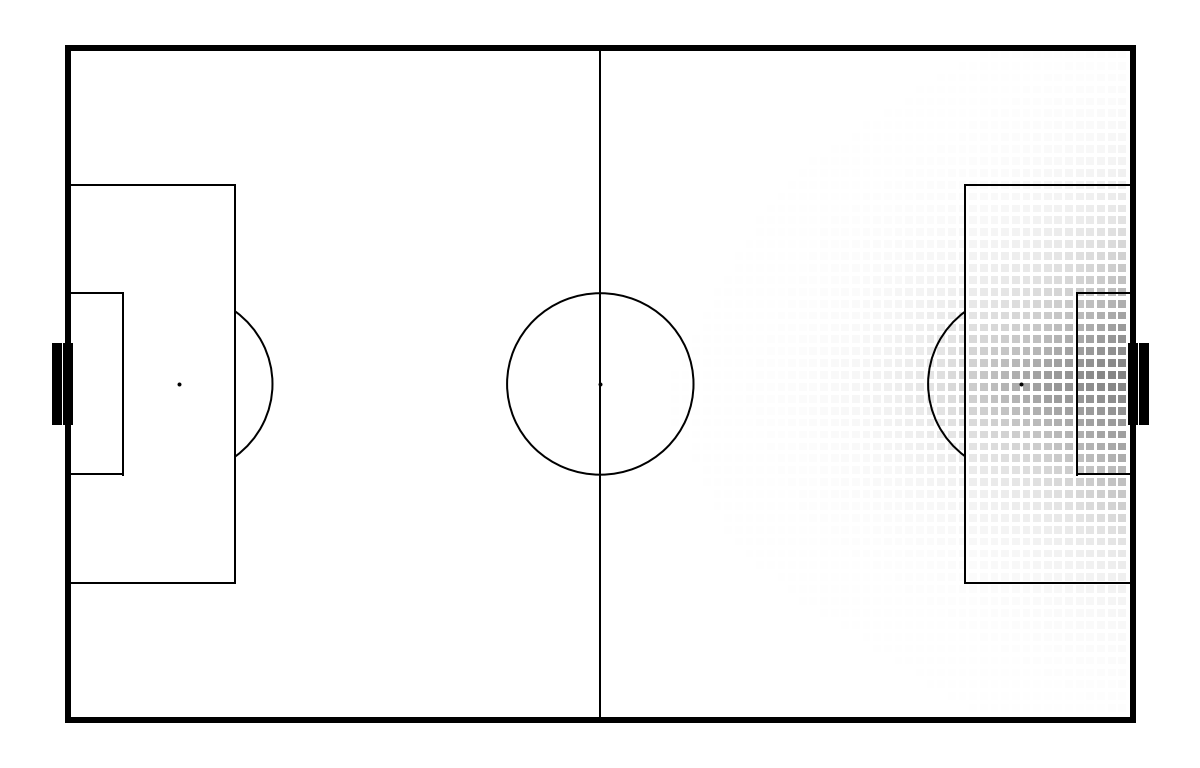

In [8]:
plot_xgmap(xgmap)